In [1]:
import pyforest
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv('insurance.csv')

<IPython.core.display.Javascript object>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# Data Preprocessing

In [4]:
df.isna().sum().sum()

0

In [5]:
df.duplicated().sum().sum()

1

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.duplicated().sum().sum()

0

# Split Numeric and String Data

In [8]:
y=df["charges"]
features=df.drop(["charges"],axis=1)
num_data=features.select_dtypes("number")
str_data=df.select_dtypes("object")

# check the distribution:

<IPython.core.display.Javascript object>

<Axes: xlabel='charges', ylabel='Count'>

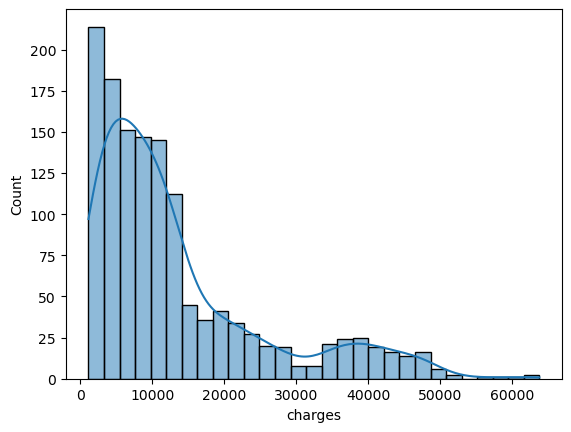

In [9]:
sns.histplot(y,kde=True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

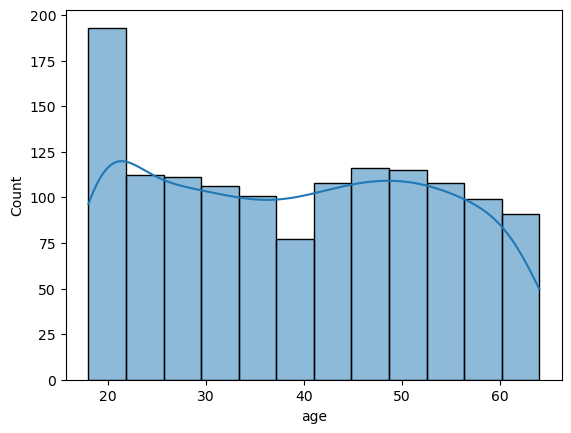

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

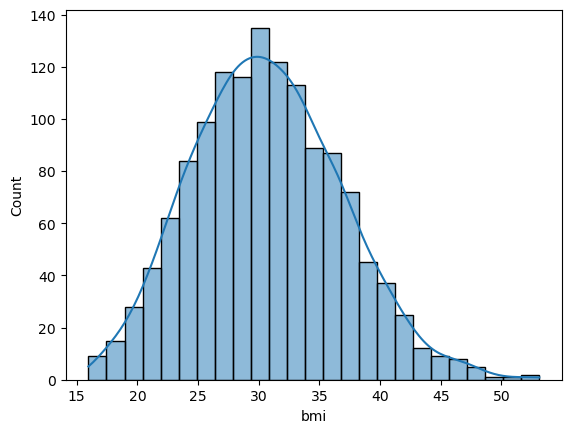

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

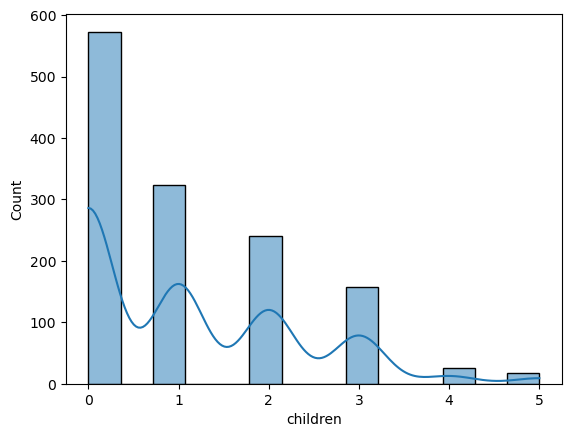

In [10]:
for col in num_data.columns:
    sns.histplot(num_data[col],kde=True)
    plt.show()

In [11]:
y_trans=np.log(y)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: xlabel='charges', ylabel='Count'>

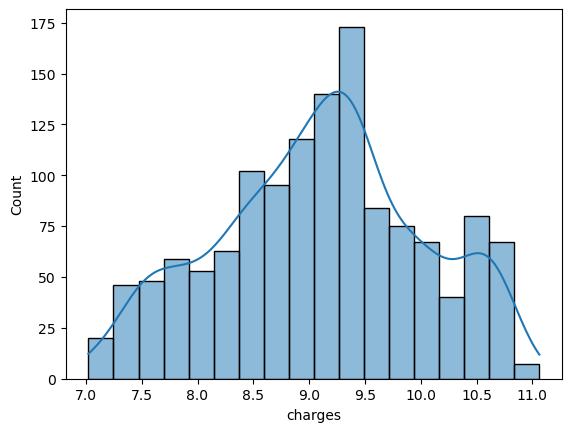

In [12]:
sns.histplot(y_trans,kde=True)

In [14]:
scaler=StandardScaler()
array=scaler.fit_transform(num_data)
num_data_scaled=pd.DataFrame(array,columns=num_data.columns)

<IPython.core.display.Javascript object>

# Outliers detection and capping

<Axes: >

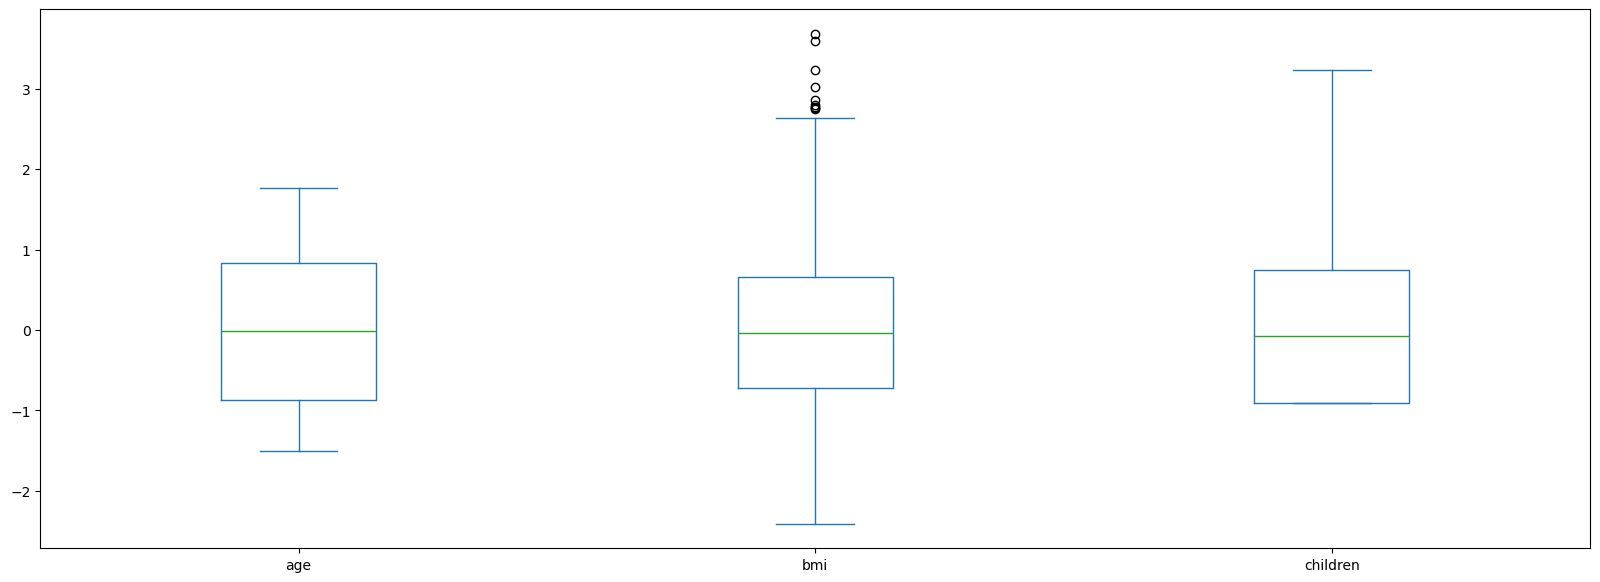

In [15]:
num_data_scaled.plot(kind='box',figsize=(20,7))

In [16]:
def outlier_capping(x,upper_limit,lower_limit):
    if x>upper_limit:
        return upper_limit
    elif x<lower_limit:
        return lower_limit
    else:
        return x



for col in num_data_scaled.columns:
    q1=np.quantile(num_data_scaled[col],0.25)
    q3=np.quantile(num_data_scaled[col],0.75)
    
    IQR=q3-q1

    upper_limit=q3+1.5*IQR
    lower_limit=q1-1.5*IQR

    num_data_scaled[col]=num_data_scaled[col].apply(lambda x:outlier_capping(x,upper_limit,lower_limit))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: >

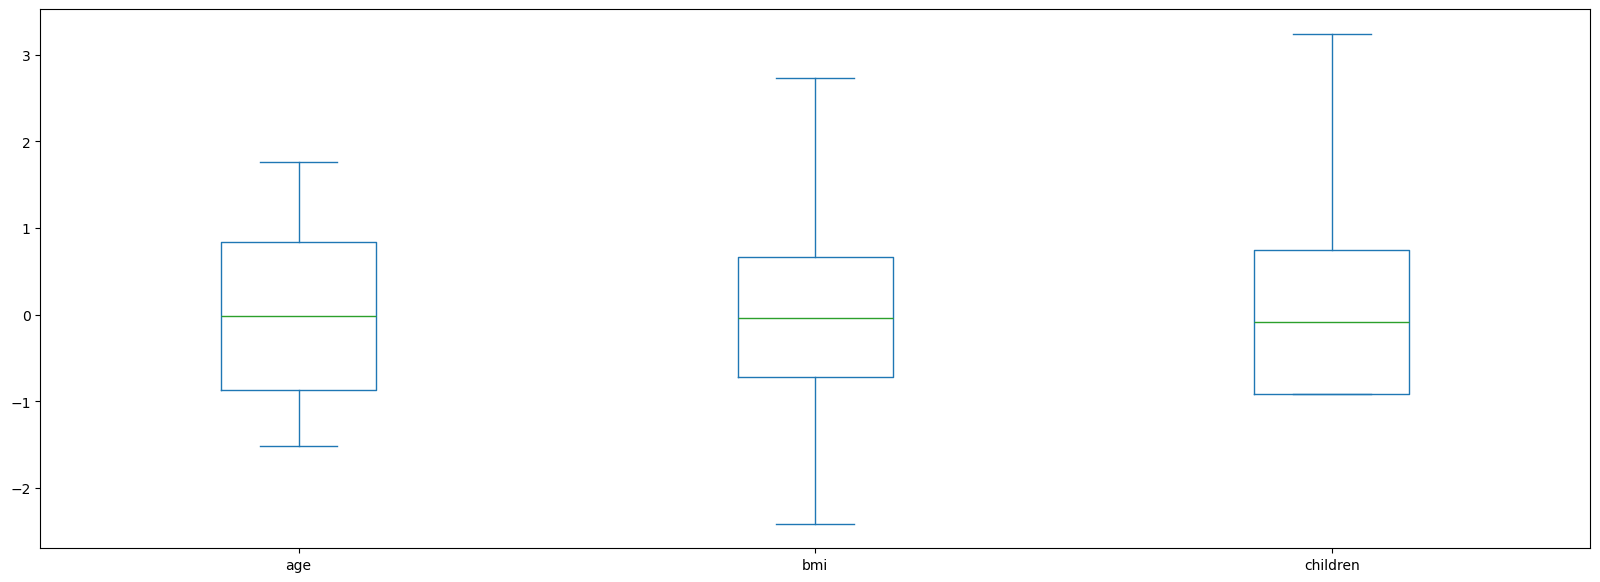

In [17]:
num_data_scaled.plot(kind='box',figsize=(20,7))

# Categorical data encoding

In [18]:
str_data

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest
...,...,...,...
1333,male,no,northwest
1334,female,no,northeast
1335,female,no,southeast
1336,female,no,southwest


In [19]:
le_sex = LabelEncoder()
le_smoker = LabelEncoder()

str_data['sex'] = le_sex.fit_transform(str_data['sex'])
str_data['smoker'] = le_smoker.fit_transform(str_data['smoker'])

In [20]:
encoded_data = pd.get_dummies(str_data['region'], drop_first=True).astype(int)


<IPython.core.display.Javascript object>

In [21]:
str_data.drop(['region'],axis=1,inplace=True)

In [22]:
output=train_test_split(num_data_scaled,str_data,encoded_data,y_trans,test_size=0.25, random_state=40)

num_data_scaled_train=output[0]
num_data_scaled_test=output[1]

str_data_train=output[2]
str_data_test=output[3]

encoded_data_train=output[4]
encoded_data_test=output[5]

y_trans_train=output[6]
y_trans_test=output[7]


<IPython.core.display.Javascript object>

In [23]:
num_data_scaled_train.corr()

,age,bmi,children
age,1.000000,0.116421,0.058137
bmi,0.116421,1.000000,0.031590
children,0.058137,0.031590,1.000000


In [24]:
num_data_scaled_train_copy=num_data_scaled_train.copy()

In [25]:
for col in num_data_scaled_train_copy.columns:

    model=LinearRegression()

    # Features: all columns except the one we’re predicting
    X = num_data_scaled_train_copy.drop(col, axis=1)
    y = num_data_scaled_train_copy[col]

    model.fit(X,y)

    pred=model.predict(X)

    print("r2 score for ",col, r2_score(num_data_scaled_train_copy[col],pred))

r2 score for  age 0.016522686636049833
r2 score for  bmi 0.014172094046022488
r2 score for  children 0.004004534483862621


In [26]:
final_num_features=num_data_scaled_train_copy.columns

In [27]:
num_data_scaled_train=num_data_scaled_train[final_num_features]
num_data_scaled_test=num_data_scaled_test[final_num_features]

In [28]:
num_data_scaled_train

,age,bmi,children
404,-0.585661,-1.683033,-0.909234
693,-0.870580,0.678324,-0.079442
436,-1.226729,0.174896,-0.909234
335,1.764921,0.629129,-0.909234
754,-0.585661,-0.494975,0.750351
...,...,...,...
1330,-1.155499,0.448748,-0.909234
1016,-0.941810,0.579934,0.750351
165,0.554015,-0.401505,2.409936
7,-0.158282,-0.479397,1.580143


In [29]:
features_combained_train=pd.concat([num_data_scaled_train.reset_index(drop=True),str_data_train.reset_index(drop=True),encoded_data_train.reset_index(drop=True)],axis=1)
features_combained_test=pd.concat([num_data_scaled_test.reset_index(drop=True),str_data_test.reset_index(drop=True),encoded_data_test.reset_index(drop=True)],axis=1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Final OLS Model

In [32]:
y_trans_train = y_trans_train.reset_index(drop=True)
features_combined_train_const=sm.add_constant(features_combained_train)
model=sm.OLS(y_trans_train,features_combined_train_const).fit()
print(model.summary())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     397.4
Date:                Tue, 09 Sep 2025   Prob (F-statistic):          2.79e-303
Time:                        22:33:46   Log-Likelihood:                -612.65
No. Observations:                1002   AIC:                             1243.
Df Residuals:                     993   BIC:                             1287.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.9051      0.033    267.235      0.0

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<function matplotlib.pyplot.show(close=None, block=None)>

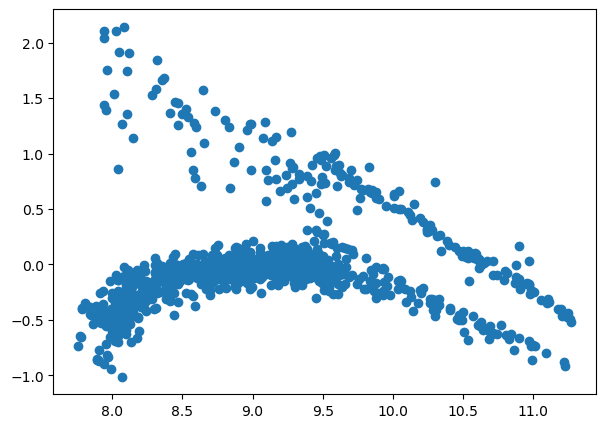

In [33]:
plt.figure(figsize=(7,5))
plt.scatter(model.predict(),model.resid)
plt.show

In [34]:
import statsmodels.api as sm
import statsmodels.stats.api as sms
test = sms.het_breuschpagan(model.resid,features_combined_train_const)[:2]
test

(62.12289612856166, 1.783505948729481e-10)

In [35]:
features_combined_test_const = sm.add_constant(features_combained_test)
test_pred = model.predict(features_combined_test_const)

# Now lengths match, so r2_score works
from sklearn.metrics import r2_score
print("Test R²:", r2_score(y_trans_test, test_pred))

Test R²: 0.7820860640681614
